# Introduction

- The FROM clause is the first to be logically processed
- Within the FROM clause, table operators operate on input tables
	- JOIN, APPLY, PIVOT, UNPIVOT (This chapter covers JOIN)
- Each table operator acts on input tables, applies a set of logical processing phases, and returns a table result
- JOIN operates on two input tables and has three fundamental types
	- CROSS JOIN
	- INNER JOIN
	- LEFT/RIGHT OUTER JOIN
- Assigning table aliases is a best practice
	- Assigning an alias to the source table requires column names from that table to be prefixed with the same alias

# CROSS JOIN

- Implements one logical query processing phase - a Cartesian product
- Each row from one input table is matched with all rows from another input table
	- If Table A has m rows, and Table B has n rows, a cross join produces m x n rows
    - 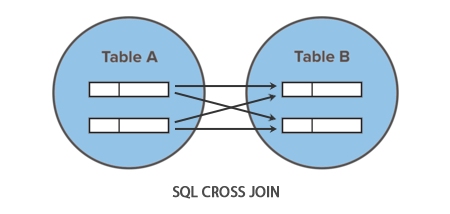

In [1]:
USE TSQLV4;

SELECT TOP 3
    C.custid,
    E.empid
FROM Sales.Customers AS C
    CROSS JOIN HR.Employees AS E; -- Results in 819 rows (91 rows in Customers, 9 rows in Employees)

(3 rows affected)

Total execution time: 00:00:00.027

custid,empid
1,2
2,2
3,2


# INNER JOIN

- Implements two logical query processing phases - a Cartesian product, a filter based on  a specified predicate (join condition)
	- The join condition is an ON statement and specifies which columns to match
- The INNER keyword is options because inner joins are default, but it is a best practice to include it
- The result set is a table that matches each record from Table A with all related records from Table B (that have a matching join condition)
	- Any record from Table A without a related record in Table B is discarded
    - 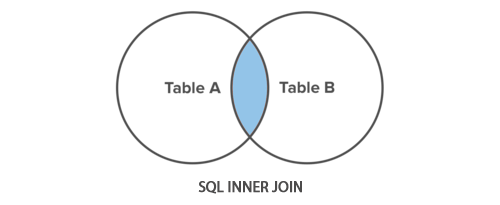

In [2]:
USE TSQLV4;

SELECT TOP 3
    E.empid,
    E.firstname,
    E.lastname,
    O.orderid
FROM HR.Employees AS E
    INNER JOIN Sales.Orders AS O
        ON E.empid = O.empid; -- Results in 819 rows (91 rows in Customers, 9 rows in Employees). All rows have a match, so none are discarded.

(3 rows affected)

Total execution time: 00:00:00.012

empid,firstname,lastname,orderid
1,Sara,Davis,10258
1,Sara,Davis,10270
1,Sara,Davis,10275


# Multi-Join Queries

- A join table operator only operates on two tables, but a single query can have multiple joins
- Multiple join table operators are processed from left to right
	- Result table of the first table operator is treated as the left input to the second table operator and so on
	- The first join operates on two base tables, all other subsequent joins use the result of the preceding join as their left input

In [3]:
USE TSQLV4;

SELECT TOP 3
    c.custid,
    C.companyname,
    O.orderid,
    OD.productid,
    OD.qty
FROM Sales.Customers AS C
    INNER JOIN Sales.Orders AS O -- Results in all records from Customers with a matching record from Orders
        ON C.custid = O.custid
    INNER JOIN Sales.OrderDetails AS OD -- Results in all records from the preceding set with a matching record from OrderDetails
        ON O.orderid = OD.orderid;

(3 rows affected)

Total execution time: 00:00:00.016

custid,companyname,orderid,productid,qty
50,Customer JYPSC,10529,55,14
50,Customer JYPSC,10529,68,20
50,Customer JYPSC,10529,69,10


# OUTER JOIN (LEFT & RIGHT)

- Outer joins apply three logical processing phases - a Cartesian product, a filter based on  a specified predicate (join condition), adds specified outer rows
- Tables are marked as preserved by prefixing OUTER JOIN with LEFT, RIGHT, or FULL 
	- LEFT OUTER JOIN: Rows from the left table are preserved
	- RIGHT OUTER JOIN: Rows from the right table are preserved
	- FULL OUTER JOIN: Rows from both left and right tables are preserved
- The third phase of the outer join identifies rows from the preserved table that does not have matching rows from the non-preserved table, and adds these rows back to the result table with NULLs as a placeholder for attributes from the non-preserved side
	- Rows that are are added back from an outer join were discarded in the filter phase
	- It might help to think of the result of an outer join as having two kinds of rows with respect to the preserved side—inner rows and outer rows. Inner rows are rows that have matches on the other side based on the ON predicate, and outer rows are rows that don’t. An inner join returns only inner rows, whereas an outer join returns both inner and outer rows.
- You can specify final filtering predicates in the WHERE clause  to return only outer rows
	- Be careful when filtering the non-preserved side
- 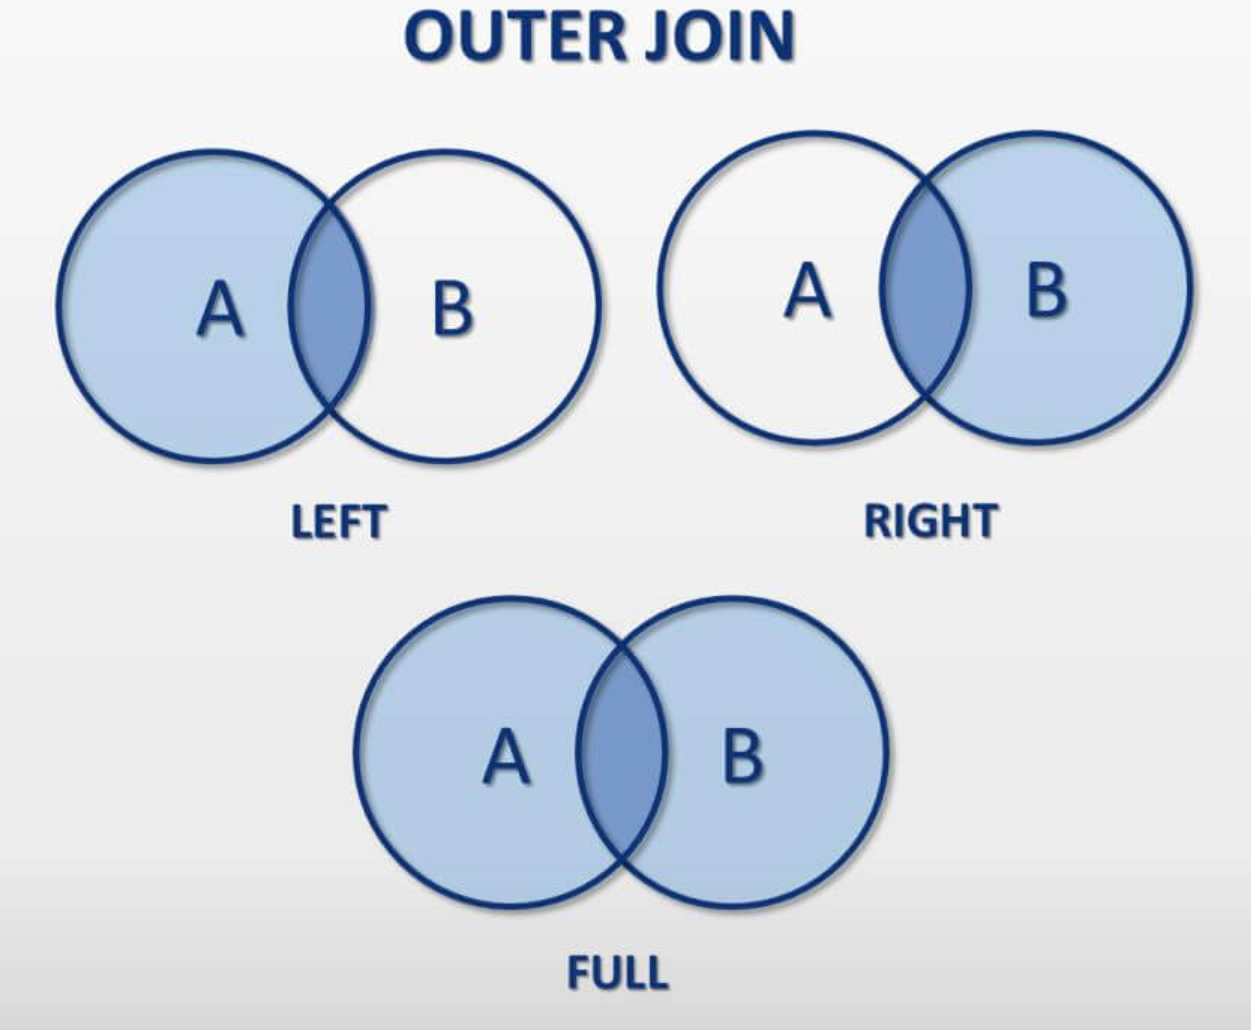

In [4]:
USE TSQLV4;

SELECT TOP 3
    C.custid,
    C.companyname,
    O.orderid
FROM Sales.Customers AS C
    LEFT OUTER JOIN Sales.Orders AS O
        ON C.custid = O.custid; -- Customers that have not placed an order will be in the result table with NULLs for orderid

SELECT TOP 3
    C.custid,
    C.companyname,
    O.orderid
FROM Sales.Customers AS C
    LEFT OUTER JOIN Sales.Orders AS O
        ON C.custid = O.custid
WHERE O.orderid IS NULL; -- Returns outer rows only. Customers without a matching order.

(3 rows affected)

(2 rows affected)

Total execution time: 00:00:00.027

custid,companyname,orderid
72,Customer AHPOP,10359
72,Customer AHPOP,10377
72,Customer AHPOP,10388


custid,companyname,orderid
22,Customer DTDMN,NULL
57,Customer WVAXS,NULL
